In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Introdução

No contexto da Visão Computacional, usamos o termo _"Object Recognition"_ (normalmente) para nos referir a um conjunto de tarefas que envolvem a identificação de objetos em imagens (digitais) **[1]**.

Entre essas tarefas, temos:
- **Classificação de Imagens.** Predizer a classe (ou categoria) de um objeto em uma imagem.
- **Localização de Objetos.** Localizar e desenhar uma caixa delimitiradora (bounding box) ao redor do objeto mais visível (*de uma classe de interesse*) em uma imagem.
- **Detecção de Objetos.** Localizar e desenhar uma caixa delimitiradora (bounding box) ao redor de um ou mais objetos (*de diversas classes de interesse*) em uma imagem.
- **Segmentação Semântica (ou "Object Instance Segmentation")**. Onde instâncias de objetos reconhecidos são indicados destacando os pixels específicos do objeto em vez de uma caixa delimitadora.

---
<div>
    <img src="https://drive.google.com/uc?id=1-AbtBgUg7CI7fvHtYVFoyQs6dVWYwfl8" width="800"/>
</div>
<p style="text-align:center"><i>Fonte: <a href="http://cs224d.stanford.edu/index.html">cs224 - Stanford University</a></i>.</p>


---

No âmbito de cada uma dessas tarefas, existem ainda diversos *overlaps* e, principalmente, sub-tarefas com diferentes necessidades e particularidades. Na Detecção de Objetos, por exemplo, temos **detecção de objetos 3D** e **detecção de objetos em tempo-real**.

### Detecção de Objetos

Existem diversos métodos para se realizar a detecção de objetos. Os métodos estado-da-arte (SOTA, do inglês *state-of-the-art*) podem ser divididos em dois grupos **[1]**:

- **One-stage Methods.** Priorizam a velocidade de inferência. Exemplos são: *YOLO*, *SDD*, *MobileNet* e *RetinaNet*.
- **Two-stage Methods.** Priorizam a eficiência da detecção. Exemplos são: *Faster R-CNN*, *Mask R-CNN* e *Cascade R-CNN*.

No entanto, todos esses métodos são fundamentados sobre um conjunto de técnicas e conceitos em comum. Isto é, **deep learning**.

## Deep Learning

Machine Learning (em português, Aprendizado de Máquina) é um campo multidisciplinar da Ciência da Computação cujo objetivo é o estudo e desenvolvimento de algoritmos capazes de aprender a realizar tarefas através de um conjunto de dados **[2]**.

As tarefas mais comuns realizadas por algoritmos de Aprendizado de Máquina, são: classificação, regressão e agrupamento.

---
<div>
    <img src="https://drive.google.com/uc?id=1-9MGKM6gj97f3-RlN141YKbSXk2A1tGW" width="400"/>
</div>
<p style="text-align:center"><i>Fonte: <a href="https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html">scikit-learn API</a></i></p>

---

### Deep Learning vs Machine Learning
As técnicas convencionais de *machine learning* são limitadas em sua capacidade de representar (ou abstrair) dados brutos. 

Logo, algoritmos tradicionais exigem uma engenharia de atributos (ou *features*) cuidadosa e experiência de domínio considerável para extrair características que transformem os dados brutos (e.g., valores dos pixels de uma imagem) em uma representação adequada a partir do qual o algoritmo (e.g., um classificador) poderia aprender **[3]**.

E, de fato, a grande maioria das tarefas que gostaríamos de executar são tarefas cujo desenvolvimento de uma representação adequada é um trabalho muito complexo (ou mesmo impossível).


<div>
    <img src="https://drive.google.com/uc?id=1-GEay9J8fwi45A_opH1bVxNcFCfqR4hx
" width="400"/>
</div>
<p style="text-align:center"><i><span>Fonte: <a href="https://unsplash.com/@finnnyc?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Finn</a> on <a href="https://unsplash.com/s/photos/street-traffic?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span></i></p>


As técnicas de *deep learning* solucionam o problema de encontrar representações adequadas ao aprender representações complexas expressas em termos de representações mais simples.

Logo, podemos definir deep learning como um conjunto de técnicas e métodos de aprendizado de máquina, normalmente baseados em redes neurais, com grandes capacidades de aprender a representar o mundo através de uma hierarquia de conceitos, onde cada conceito é definido em relação a conceitos mais simples e representações mais abstratas computadas em termos de outras menos abstratas **[4]**.

O aspecto principal do aprendizado profundo é que as representações não são projetadas por humanos e sim aprendidas a partir de dados usando um procedimento de aprendizado de propósito geral **[3]**.

<div>
    <img src="https://drive.google.com/uc?id=1-5LvQbCCFtqAOzlQIDuqseRW6uLQeyxm" width="500"/>
</div>
<p style="text-align:center"><i>Fonte: Goodfellow, Ian, et al. Deep learning. [4] </i></p>


### Redes Neuras Artificiais
As Redes Neurais Artificiais (em inglês, Artificial Neural Networks) são (por falta de descrição melhor) o coração do Aprendizado Profundo. Em outras palavras, (todas) as técnicas e métodos de *deep learning* derivam de redes neurais.

Como o nome sugere, as redes neurais artificiais são algoritmos de aprendizado que simulam o funcionamento do cérebro. Essencialmente, são algoritmos que aprendem através de uma composição hierárquica de diversas camadas de processamento e transformações não-lineares.
- *(De fato, quando nos referimos ao caráter hierárquico, multicamadas e/ou diferentes níveis de abstrações, estamos mencionado implicitamente as propriedades das redes neurais)*.

As redes neurais são, normalmente, formadas por neurônios artificiais organizados em diferentes camadas.

A organização dos neurônios e camadas de uma rede neural define sua arquitetura (ou, topologia).


### Multilayer Perceptron
A mais conhecida e simples rede neural é a *Feedforward Multilayer Neural Network* (também conhecida como, *Multilayer Perceptron*). A Multilayer Perceptron (MLP) é rede neural com uma camada de entrada, uma ou mais camadas ocultas e uma camada de saída. Cada camada possui um ou mais neurônios artificiais **[1, 2, 3, 4]**.
- **Camada de Entrada.** A camada de entrada (do inglês, *input layer*) é uma camada neurônios onde cada neurônio representa uma variável de entrada (e.g., colunas de um conjunto de dados).

  O papel da camada de entrada é simplesmente receber os valores (i.e., variáveis, atributos, etc.) do seu conjunto de dados e passá-los para a próxima camada (no caso, uma hidden layer).
- **Camadas Ocultas.** Todas as camadas após a camada de entrada são denominadas camadas ocultas.

  É a composição e encadamento de diversas camadas ocultas que define a composição hierárquica da transformações não-lineares (ou seja, quando dizemos que o poder de uma rede neural está na sua composição hierarquica de transformações não-linares, estamos nos referindo as camadas ocultas de uma rede neural).
  
  Cada camada oculta é responsável por uma transformação na cadeia de transformações que há em uma rede neural.
- **Camada de Saída.** A última camada oculta de uma rede neural é denominada de output layer e seu papel é retornar um valor ou vetor de valores que correspondem ao formato exigido para o problema.

  Além disso, uma vez que a função de ativação é responsável pela saída dos neurônios (e, consequemente, da camada), a escolha da função de ativação na camada de saída é fortemente restringida pelo tipo de problema que você está modelando.


> *TODO*

### Treinamento de Redes Neurais
O processo de aprendizado das redes neurais ocorre através de um algoritmo denominado *backpropagation* **[1, 2, 3, 4]**.

O algoritmo de backpropagation consiste em duas etapas:
- **Forward Step (ou, Etapa de Propagação).** Etapa onde as entradas são passadas através da rede e as predições de saída obtidas.
- **Backward Setp (ou, Etapa de Retropropagação).** Etapa onde calculamos utilizamos o vetor gradiente da função que descreve a rede neural para atualizar as conexões entre os neurônios da nossa rede a fim de minimizar seu erro.


### **Convolutional (Neural) Networks**
As Redes Neurais Convolucionais (CNN, do inglês Convolutional Neural Networks) são o principal motivo da fama das redes neurais e deep learning.

São capazes de preservar a estrutura espacial dos dados, aprendendo representações através de convoluções (ou, operações de convolução).

Por exemplo, no caso de imagens, CNNs preservam o relacionamento espacial entre os pixels as representações aprendidas são utilizadas ao longo de toda a imagem, possibilitando que objetos sejam detectados com precisão.

Essencialmente, uma CNN é formada por três tipos de layers, além da input layer:
- Convolutional Layer
- Pooling Layer
- Dense (fully connected) Layer.

Aqui, a convolutional layer e pooling layer formam, juntas, o bloco de feature learning de uma CNN (ou seja, são responsáveis pela grande capacidade de aprender representações nos dados de entrada).



#### **Convolutional Layer**
A Convolutional layer é a camada fundamental das CNNs.

Em conjunto com a camada de pooling, forma o módulo de extração de features dos dados de entrada (ou seja, camada de convolução é quem aprende representacões nos dados de entrada).

A extração (e construção) das *features* ocorre através de operações de convolução.

##### **Operação de Convolução**

Intuitivamente, a pperação de convolução é uma regra que descreve como mesclar dois conjuntos de informações.

Assim, dada uma entrada, a operação de convolução consiste em aplicar um filtro (ou kernel de convolução) sobre a entrada e retornar um mapa de características.

- O filtro é responsável por extrair características específicas da minha entrada (e.g., bordas, formato, linhas verticais e linhas horizontais de uma imagem)
- O mapa de características é a expressão da entrada em termos das características extraídas.

Na prática, a convolução é a múltiplicação dos dados de entrada pelo filtro.



In [ ]:
from IPython.display import Image
Image(url='https://drive.google.com/uc?id=1n_Us59d6DwSj__4_F8YyWMDnewzsnRhE')

# Fonte: http://www.ashokrahulgade.com/skills/DL/CNN/Introduction.html

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

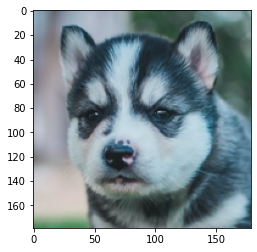

In [ ]:
image = cv2.imread('/content/drive/My Drive/minicurso_sieel-deteccao_objetos/notebook_images/dog.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
blur_kernel = np.ones((3, 3)) / 9
blur_kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

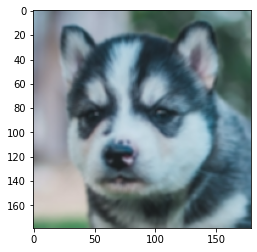

In [ ]:
img = cv2.filter2D(image, -1, blur_kernel)
plt.imshow(img)

In [ ]:
edge_kernel = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]])
edge_kernel

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

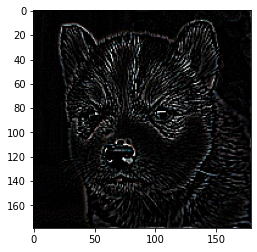

In [ ]:
img = cv2.filter2D(image, -1, edge_kernel)
plt.imshow(img)

#### **Pooling Layer**
A camada de pooling tem como objetivo consolidar as _features_ aprendidas através de uma representação resumida e genérica. Tecnicamente, a camada de pooling busca tornar as *features* aprendidas invariantes à tradução local **[1, 4]**.

Na prática, significa aplicar uma operação, chamada de *operação de pooling*, sobre um mapa de características que sumarize as *features* encontradas. Alguns exemplos, são:
- **Average Pooling.** Calcula o valor médio para cada *patch* do *feature map*.
- **Maximum Pooling (ou Max Pooling).** Calcula o valor máximo para cada *patch* do *feature map*.

Naturalmente, o *feature map* resultante (chamado de *pooled feature map*) possui uma dimensão menor, porém mais expressiva **[1]**.

#### **Dense (fully connected) Layer**
Camadas densas (ou totalmente conectadas), são as camadas convecionais compostas por neurônios artificiais e funções de ativação não lineares.

No caso das CNNs, camadas densas são (normalmente) implementadas no final da rede para que assim possam utilizar as features (aprendidas) extraídas pelas camadas de convolução e pooling, a fim de realizar a inferência.



<div>
    <img src="https://drive.google.com/uc?id=120xwJyUCQXNsy89y7lDynl5K6N-twJn1" width="700"/>
</div>
<p style="text-align:center"><i>Fonte: VGG16 Architecture (Figure by Max Ferguson)</i></p>


### **CNN vs MLP**
- MLPs não são escaláveis para dados de alta dimensionalidade (e.g., imagens).
- CNNs são mais adequadas para lidar com dados onde é necessária a preservação da estrutura espacial.
- CNNs invariantes à tradução local.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

O conjunto de dados MNIST, é um conjunto de dados composto por 60.000 imagens para treinamento e 10.000 imagens para teste. Cada imagem contém único digito de 0 a 9 escrito à mão.

Todas as imagens são em escala cinza, centralizadas e dimensionadas em 28x28 pixels.

In [ ]:
IMAGE_HEIGHT, IMAGE_WIDTH = 28, 28
N_CLASSES = 10

# gradient descent settings
BATCH_SIZE = 128
EPOCHS = 2

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


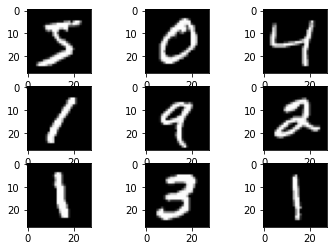

In [ ]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
X_train_reshaped = X_train.reshape((X_train.shape[0], IMAGE_HEIGHT, IMAGE_WIDTH, 1))
X_test_reshaped  = X_test.reshape((X_test.shape[0], IMAGE_HEIGHT, IMAGE_WIDTH, 1))

In [ ]:
X_train_reshaped.shape, X_test_reshaped.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=N_CLASSES)
y_test  = tf.keras.utils.to_categorical(y_test, num_classes=N_CLASSES)

In [ ]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [ ]:
# Technical necessities
X_train_reshaped = X_train_reshaped.astype('float32')
X_test_reshaped = X_test_reshaped.astype('float32')

X_train_norm = X_train_reshaped / 255.0
X_test_norm = X_test_reshaped / 255.0

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(
      32,
      (3, 3),
      activation='relu',
      kernel_initializer='he_uniform',
))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
  
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [ ]:
model.fit(X_train_norm, y_train, BATCH_SIZE, EPOCHS)

Epoch 1/2
469/469 [==============================] - 2s 4ms/step - loss: 0.2109 - accuracy: 0.9360
Epoch 2/2
469/469 [==============================] - 2s 3ms/step - loss: 0.0691 - accuracy: 0.9797


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_norm, y_test, verbose=0)
print('Test data loss:', test_loss)
print('Test data accuracy:', test_accuracy)

Test data loss: 0.055433239787817
Test data accuracy: 0.9815000295639038


In [ ]:
model.predict_classes(X_test_norm)

array([7, 2, 1, ..., 4, 5, 6])

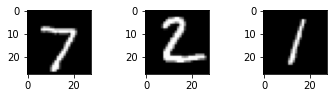

In [ ]:
for i in range(3):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_test[i], cmap=plt.get_cmap('gray'))
plt.show()



---



## **Deep Learning Na Detecção de Objetos**
Na Detecção de Objetos, o objetivo é localizar e desenhar uma caixa (*bounding box*) ao redor de um ou mais objetos (de diversas classes de interesse) em uma imagem.

### **Abordagem Intuitiva**
Considerando que temos ferramentas capazes de classificar imagens, podemos:
1. Dividir uma imagem de entrada em diversas imagens menores (ou seja, regiões).
2. Classificar cada uma dessas regiões através de uma CNN.
3. Ao classificar todas as regiões, podemos combiná-las para retornar à imagem original.

Porém, notem que essa abordagem é muito (muito) cara computacionalmente. Afinal, existe uma combinação enorme de regiões de interesse que podemos encontrar. Ao mesmo tempo, mesmo com uma enorme quantidade de regiões, ainda podemos acabar cobrindo parcialmente os objetos (e não cobrindo-os completamente).

Ainda assim, encontrar diferentes regiões de uma imagem de entrada e tentar identificar (i.e., classificar) um objeto em uma dessas regiões é uma ideia promissora.


### **R-CNN**
A família de métodos R-CNN segue exatamente a abordagem intuitiva para detectar objetos em imagens.

#### **Como Funciona?**
1. Extraímos propostas de regiões (também chamadas de região de interesse) da imagem que podem ou não conter os objetos que queremos detectar.

    No caso do R-CNN, em particular, é utilizado o método *Selective Search.* O que esse método faz é:
    - Realiza uma segmentação da imagem através da intesidade dos pixels usando uma estratégia baseadas em grafos de Felzenszwalb and Huttenlocher.
    - Então, regiões similares (com base em similaridade de cor, textura, tamanho e formato) são combinadas em uma região maior.
    - O processo é repetido iterativamente. E, no caso do R-CNN, até encontrar aproximadamente 2 mil regiões.

2. Cada região extraída é processada por uma CNN que tem como objetivo detectar e extrair *features* no dado de entrada e produzir um vetor de variáveis informativo.
3. O vetor é consumido por N classificadores lineares (no caso do R-CNN, são Support Vector Machines), onde cada classificador é especializado em identificar uma classe de interesse.
4. Cada um dos N classificadores produz uma probabilidade de a região conter completamente o objeto que este é especialista em classificar.
5. Após todas as regiões serem pontuadas, um algoritmo de ajuste da caixa (i.e., *bounding box*) é aplicado às regiões com melhor pontuação.

<div>
    <img src="https://drive.google.com/uc?id=14uosF-_6q1TTO1nNz2n_w9eKNvTQqoor" width="700"/>
</div>


#### **Problemas**
- **Inferência extremamente custosa.** Necessário inferir aproximadamente 2000 regiões por imagem.
- **Treinamento extremamente custoso e complexo.** Há muitos modelos para serem treinados e ajustados. Logo, há não apenas um custo de computação e tempo, mas também um grande esforço para desenvolver vários modelos de aprendizado diferentes.

#### **Variations**
- Fast R-CNN, Faster R-CNN, **Mask R-CNN**, Cascade R-CNN.


### YOLO(v3)
O framework YOLO (You Only Look Once) trata a tarefa de detecção de objetos como um problema de regressão.

Ou seja, ao invés de procurarmos por regiões que podem conter um objeto que queremos detectar e, então, classificar essa região. No YOLO, o objetivo é dividir a imagem em uma grade e, para cada cécula da grade, tentamos inferir uma *bounding box* e classificá-la. Este processo é realizado por uma única grande Convolutional Neural Network em um _"one big step"_

<div>
    <img src="https://drive.google.com/uc?id=1Z-Wr91BBHsxXwsiSE9YwI6MrD1dAWW8w" width="700"/>
</div>
<p style="text-align:center"><i>Fonte: YOLO Workflow (from original paper)</i></p>

Mais precisamente.
- Dividimos a imagem em uma grade (e.g., grade SxS) e, para cada célula dessa grade:
    - Realizamos uma regressão em cada B caixas para uma caixa final com 5 dimensões (dx, dy, dh, dw, confiança)
    - Inferimos a probabilidade de cada uma das C classes estar na caixa final.

Na prática, estaremos tentando inferir uma matriz de dimensão S x S x (5 * B + C)

<div>
    <img src="https://drive.google.com/uc?id=1TpW-oimjx2konqAnZPMv202d_-LMtj9s" width="700"/>
</div>
<p style="text-align:center"><i>Fonte: Weng, Lilian [5]</i></p>


# **Ferramentas**

- [keras-yolo3](https://github.com/experiencor/keras-yolo3)
- [darknet](https://github.com/pjreddie/darknet)
- [TensorFlow Object Detection API](https://github.com/tensorflow/models/tree/master/research/object_detection)

# Referências (e Sugestões de Leitura)

- **[1].** Brownlee, Jason. Deep Learning for Computer Vision: Image Classification, Object Detection, and Face Recognition in Python. Machine Learning Mastery, 2019.
- **[2].** Géron, Aurélien. Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems. O'Reilly Media, 2019
- **[3].** LeCun, Yann, Yoshua Bengio, and Geoffrey Hinton. "Deep learning." Nature 521.7553 (2015): 436-444.
- **[4].** Goodfellow, Ian, et al. Deep learning. Vol. 1. Cambridge: MIT press, 2016.
- **[5].** Weng, Lilian. “Object Detection Part 4: Fast Detection Models.” Lil'Log, 27 Dec. 2018, lilianweng.github.io/lil-log/2018/12/27/object-detection-part-4.html. 
